In [98]:
import pandas as pd

In [100]:
df1 = pd.read_excel("QVI_transaction_data.xlsx")

In [101]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [102]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Length: 264836, dtype: bool

In [103]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [104]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [105]:
df1['DATE'].min(), df1['DATE'].max()

(43282, 43646)

In [106]:
df1['DATE'] = pd.to_datetime(df1['DATE'], origin='1899-12-30', unit='D')

In [107]:
df1['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [108]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")

In [109]:
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [110]:
df2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
72632    False
72633    False
72634    False
72635    False
72636    False
Length: 72637, dtype: bool

In [111]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [112]:
df2['PREMIUM_CUSTOMER'] = df2['PREMIUM_CUSTOMER'].astype('category')

In [113]:
df2['LIFESTAGE'] = df2['LIFESTAGE'].astype('category')

In [114]:
df2.dtypes

LYLTY_CARD_NBR         int64
LIFESTAGE           category
PREMIUM_CUSTOMER    category
dtype: object

In [115]:
df = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='outer')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,YOUNG FAMILIES,Mainstream
264832,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Premium
264833,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,OLDER FAMILIES,Budget
264834,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,OLDER FAMILIES,Budget


In [116]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,YOUNG FAMILIES,Mainstream
264832,2018-10-01,88,2370751,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,YOUNG FAMILIES,Premium
264833,2018-10-24,88,2370961,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,OLDER FAMILIES,Budget
264834,2018-10-27,88,2370961,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,OLDER FAMILIES,Budget


In [117]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [118]:
df = df[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']]

In [119]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [120]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [121]:
df['PROD_NAME'] = df['PROD_NAME'].replace(r'G$', 'g', regex = True)

In [122]:
df['PROD_WEIGHT'] = df['PROD_NAME'].str.extract(r'(\d+g)$')

In [123]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150g
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,Grain Waves Sour Cream&Chives 210g,1,3.6,210g
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175g
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW Original Stacked Chips 160g,1,1.9,160g
...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210g
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150g
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165g
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300g


In [124]:
df.isnull().sum()

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
PROD_WEIGHT         3257
dtype: int64

In [150]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace(r'(\d+g)$', '', regex = True)

In [152]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace(r'\s+', ' ', regex = True).str.strip()

In [153]:
df['PROD_NAME'] = df['PROD_NAME'].replace({
    'RED': 'RRD',
    'RED ROCK DELI': 'RRD',
    'Red Rock Deli': 'RRD',
    'Natural Chip Company': 'NCC',
    'Natural Chip Compny': 'NCC',
    'Natural ChipCo': 'NCC',
    'Natural Chip Co': 'NCC',
    'Woolworths': 'WW',
    'Doritoss': 'Doritos',
    'Dorito': 'Doritos',
    'GrnWves': 'GrainWaves',
    'Grain Waves': 'GrainWaves',
    'Old El Paso': 'OldElPaso',
    'Cobs Popd': 'CobsPopd'
}, regex = True)

In [155]:
df['PROD_NAME']

0                                 NCC SeaSalt
1                      RRD Chikn&Garlic Aioli
2                GrainWaves Sour Cream&Chives
3                          NCC Hony Soy Chckn
4                   WW Original Stacked Chips
                         ...                 
264831                GrainWaves Sweet Chilli
264832        Kettle Tortilla ChpsFeta&Garlic
264833         Tyrrells Crisps Lightly Salted
264834       OldElPaso Salsa Dip Chnky Tom Ht
264835    Smiths Crinkle Chips Salt & Vinegar
Name: PROD_NAME, Length: 264836, dtype: object

In [158]:
df['BRAND_NAME'] = df['PROD_NAME'].str.extract(r'^(\w+)')

In [35]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,BRAND_NAME
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,NCC SeaSalt,2,6.0,175g,NCC
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,RRD Chikn&Garlic Aioli,1,2.7,150g,RRD
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,GrainWaves Sour Cream&Chives,1,3.6,210g,GrainWaves
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,NCC Hony Soy Chckn,1,3.0,175g,NCC
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW Original Stacked Chips,1,1.9,160g,WW
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,GrainWaves Sweet Chilli,2,7.2,210g,GrainWaves
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Kettle Tortilla ChpsFeta&Garlic,2,9.2,150g,Kettle
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Tyrrells Crisps Lightly Salted,2,8.4,165g,Tyrrells
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,OldElPaso Salsa Dip Chnky Tom Ht,2,10.2,300g,OldElPaso


In [160]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace(r'^(\w+)', '', regex = True)

In [162]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES',
       'PROD_WEIGHT', 'BRAND_NAME'],
      dtype='object')

In [164]:
df[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'TXN_ID', 'PROD_NBR', 'BRAND_NAME', 'PROD_NAME', 'PROD_WEIGHT', 'PROD_QTY', 'TOT_SALES']]

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,BRAND_NAME,PROD_NAME,PROD_WEIGHT,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,NCC,SeaSalt,175g,2,6.0
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,RRD,Chikn&Garlic Aioli,150g,1,2.7
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,GrainWaves,Sour Cream&Chives,210g,1,3.6
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,NCC,Hony Soy Chckn,175g,1,3.0
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,WW,Original Stacked Chips,160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,GrainWaves,Sweet Chilli,210g,2,7.2
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Kettle,Tortilla ChpsFeta&Garlic,150g,2,9.2
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Tyrrells,Crisps Lightly Salted,165g,2,8.4
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,OldElPaso,Salsa Dip Chnky Tom Ht,300g,2,10.2


In [166]:
lifestage_sales = df.groupby('LIFESTAGE').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False)
lifestage_sales

C:\Users\satwa\AppData\Local\Temp\ipykernel_11220\392605712.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifestage_sales = df.groupby('LIFESTAGE').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False)


,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
OLDER FAMILIES,353767.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


<Axes: xlabel='LIFESTAGE'>

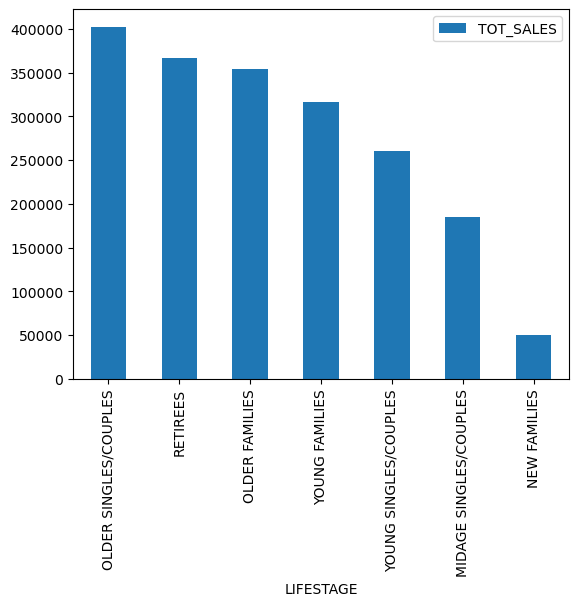

In [168]:
lifestage_sales.plot(kind = 'bar')

In [170]:
premium_sales = df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False)
premium_sales

C:\Users\satwa\AppData\Local\Temp\ipykernel_11220\478526583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  premium_sales = df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False)


,TOT_SALES
PREMIUM_CUSTOMER,
Mainstream,750744.50
Budget,676211.55
Premium,507458.95


<Axes: xlabel='PREMIUM_CUSTOMER'>

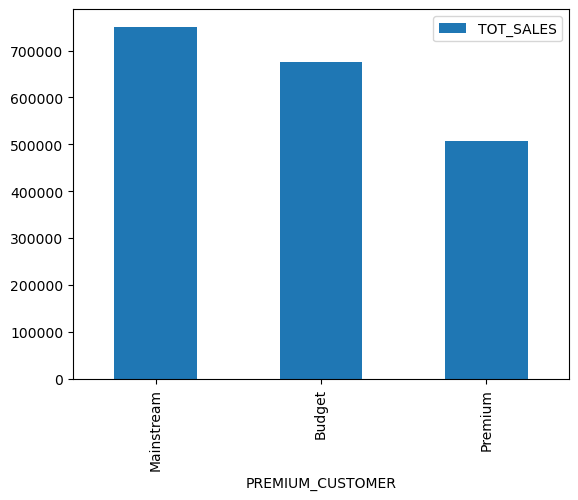

In [172]:
premium_sales.plot(kind = 'bar')

In [174]:
five_preferred_brands = df.groupby('BRAND_NAME').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False).head(5)
five_preferred_brands

,TOT_SALES
BRAND_NAME,
Kettle,390239.8
Smiths,210076.8
Doritoss,201538.9
Pringles,177655.5
RRD,95046.0


<Axes: title={'center': 'Top 5 preferred brands on Total Sales'}, ylabel='TOT_SALES'>

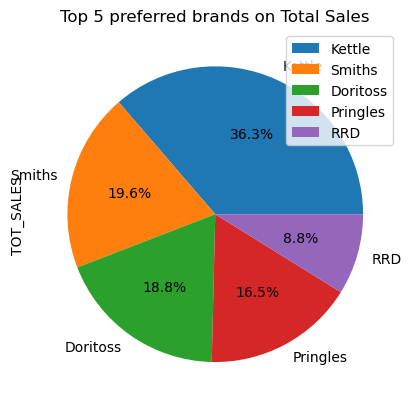

In [176]:
five_preferred_brands.plot(kind = 'pie', y = 'TOT_SALES', autopct = '%1.1f%%', title = 'Top 5 preferred brands on Total Sales')

In [178]:
sales_by_size = df.groupby('PROD_WEIGHT').agg({'TOT_SALES': 'sum'}).sort_values('TOT_SALES', ascending = False).head(5)
sales_by_size

,TOT_SALES
PROD_WEIGHT,
175g,485437.4
150g,304288.5
134g,177655.5
110g,162765.4
170g,146673.0


<Axes: title={'center': 'Top 5 Sales by size'}, ylabel='TOT_SALES'>

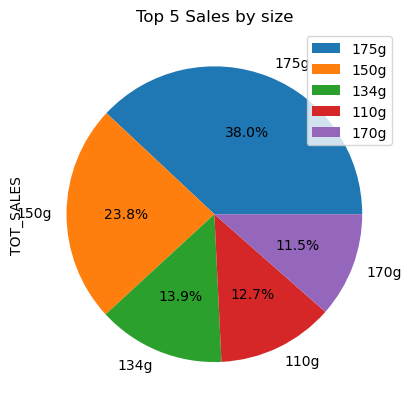

In [180]:
sales_by_size.plot(kind = 'pie', y = 'TOT_SALES', autopct = '%1.1f%%', title = "Top 5 Sales by size")

In [182]:
avg_spent = df['TOT_SALES'].mean()
avg_spent

7.304199580117505

In [184]:
avg_spend_mainstream = df[df['PREMIUM_CUSTOMER'] == 'Mainstream'].agg({'TOT_SALES': 'mean'})
avg_spend_mainstream

TOT_SALES    7.361106
dtype: float64

In [186]:
compare_df = pd.DataFrame({
    'Average Spent': [avg_spent],
    'Average Spent by Mainstream': [avg_spend_mainstream.values[0]]
})
compare_df

,Average Spent,Average Spent by Mainstream
0,7.3042,7.361106


After cleaning the data and transforming the data, I have found the following insights:
1. Based on LIFESTAGE, Old Singles / Couples spent the most.
2. Based on PREMIUM, suprisingly mainstream spent the most surpassing both Budget and Premium customers.
3. Top 5 brands were declared based on total sales. Kettle is the most popular brand followed by Smiths, Doritos, Pringles and RRD.
4. Top 5 popular products based on size are 175g, 150g, 134g, 110g and 170g.
5. On an average all the customers are spending 7.30 while Mainstream customers are spending 7.36.
Kettle is most sold and also 175g packs are most sold so need to stock them up regularly and mainstream customers are top spenders while Old singles or couples if categorized on LIFESTAGE.

In [189]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,BRAND_NAME
0,2018-10-17,1,1000,YOUNG SINGLES/COUPLES,Premium,1,5,SeaSalt,2,6.0,175g,NCC
1,2018-09-16,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2,58,Chikn&Garlic Aioli,1,2.7,150g,RRD
2,2019-03-07,1,1003,YOUNG FAMILIES,Budget,3,52,Sour Cream&Chives,1,3.6,210g,GrainWaves
3,2019-03-08,1,1003,YOUNG FAMILIES,Budget,4,106,Hony Soy Chckn,1,3.0,175g,NCC
4,2018-11-02,1,1004,OLDER SINGLES/COUPLES,Mainstream,5,96,Original Stacked Chips,1,1.9,160g,WW
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2018-12-08,88,2370701,YOUNG FAMILIES,Mainstream,240378,24,Sweet Chilli,2,7.2,210g,GrainWaves
264832,2018-10-01,88,2370751,YOUNG FAMILIES,Premium,240394,60,Tortilla ChpsFeta&Garlic,2,9.2,150g,Kettle
264833,2018-10-24,88,2370961,OLDER FAMILIES,Budget,240480,70,Crisps Lightly Salted,2,8.4,165g,Tyrrells
264834,2018-10-27,88,2370961,OLDER FAMILIES,Budget,240481,65,Salsa Dip Chnky Tom Ht,2,10.2,300g,OldElPaso


In [239]:
df.to_csv("C:\\Users\\satwa\\Downloads\\Cleaned_QVI_Data.csv", index = False)

In [241]:
from IPython.display import FileLink

# Generate a download link for the file
FileLink(r'C:\Users\satwa\Downloads\Cleaned_QVI_Data.csv')


C:\Users\satwa\Downloads\Cleaned_QVI_Data.csv